# Pozo Demo

For adding data "manually"

In [1]:
# pip install pozo
import numpy as np
import pozo

<IPython.core.display.Javascript object>

## Generating some test data

In [2]:
cycles = 2
resolution = 2000 # how many datapoints to generate

length = np.pi * 2 * cycles
curve1 = np.sin(np.arange(0, length, length / resolution))
curve2 = np.cos(np.arange(0, length, length / resolution))
depth = np.arange(0, resolution)

## Creating Pozo Traces From Data

**Here is where you would loop through a GeoH5 data file and generate an array of traces w/ mnemonics:**

In [3]:
trace1 = pozo.Trace(
    curve1,
    unit="gAPI",
    depth=depth,
    depth_unit="meter",
    mnemonic="one"
)

trace2 = pozo.Trace(
    curve2,
    unit="meter*ohm",
    depth=depth,
    depth_unit="meter",
    mnemonic="two"
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

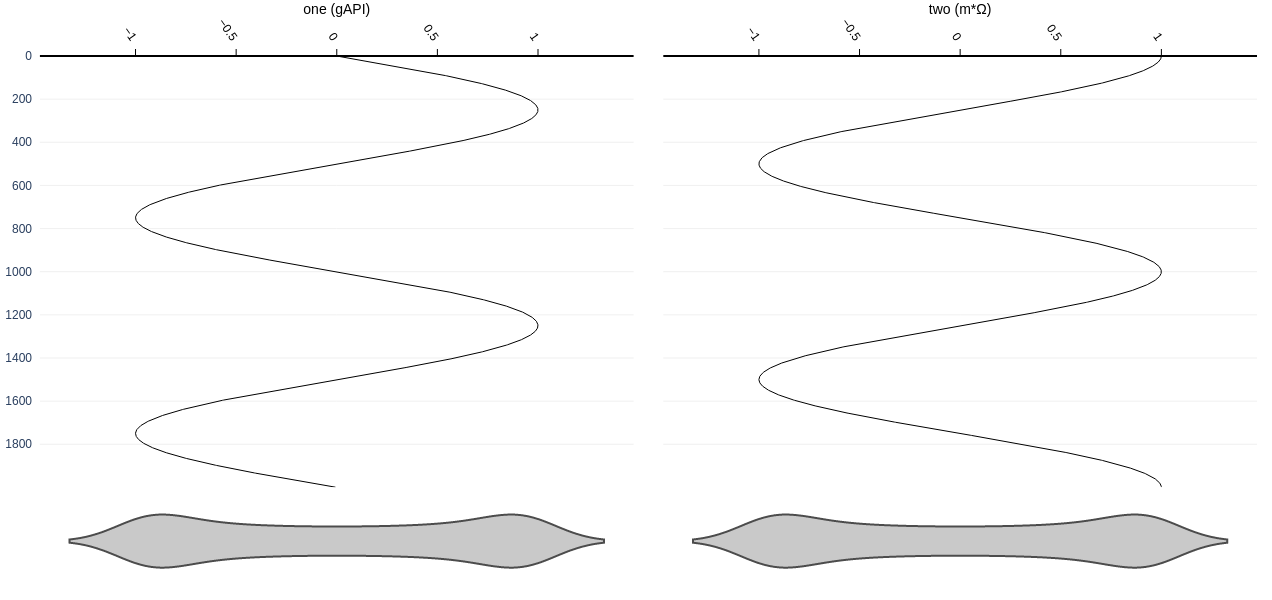

In [4]:
graph1 = pozo.Graph(trace1, trace2)
graph1.summarize_curves(height=600).show(renderer="plotly_mimetype")

### Step 3: Customize The Graph

<IPython.core.display.Javascript object>

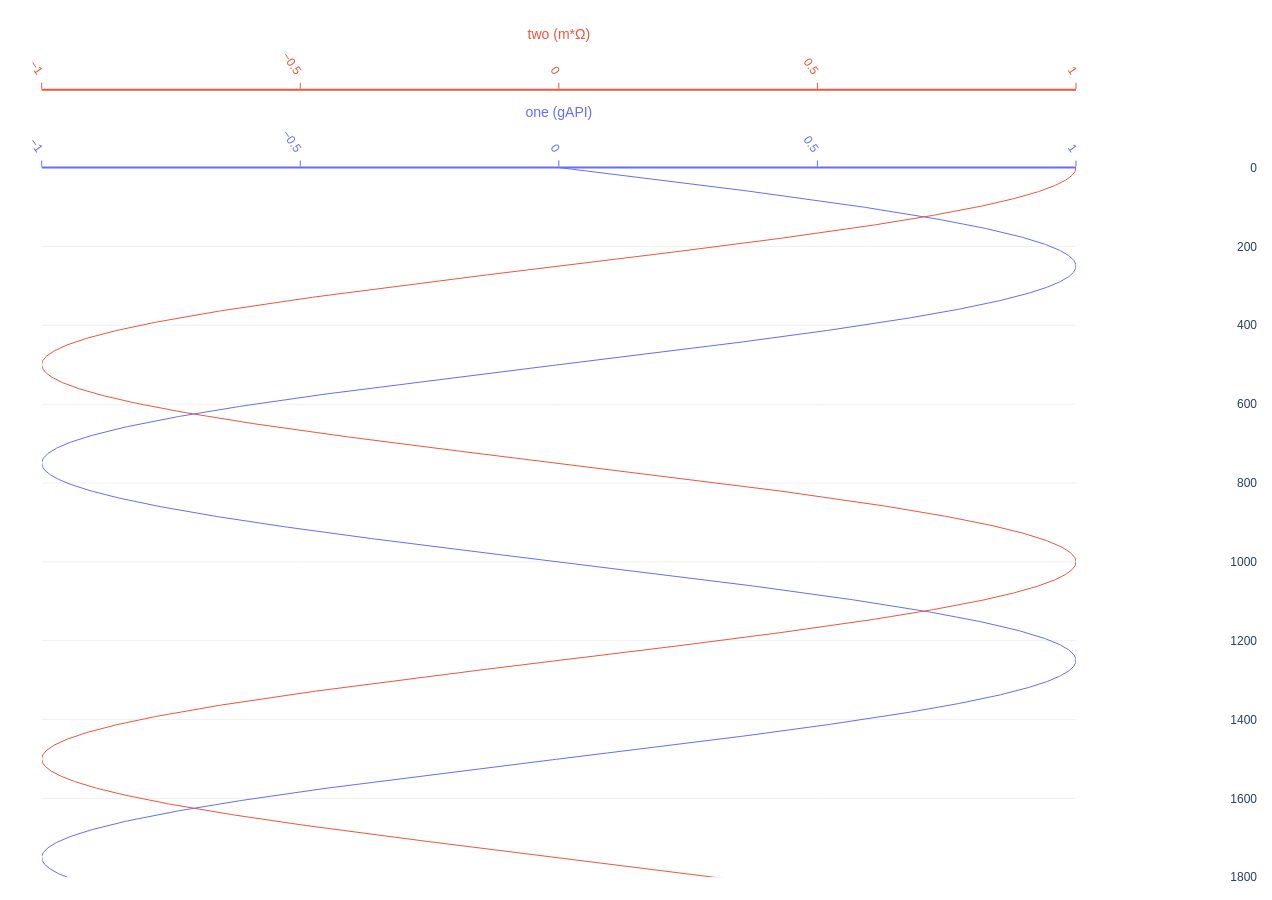

In [5]:
graph1.combine_tracks("one", "two")

graph1.render(depth_position=1, depth=[0, 1800]).show(renderer="plotly_mimetype")

<IPython.core.display.Javascript object>

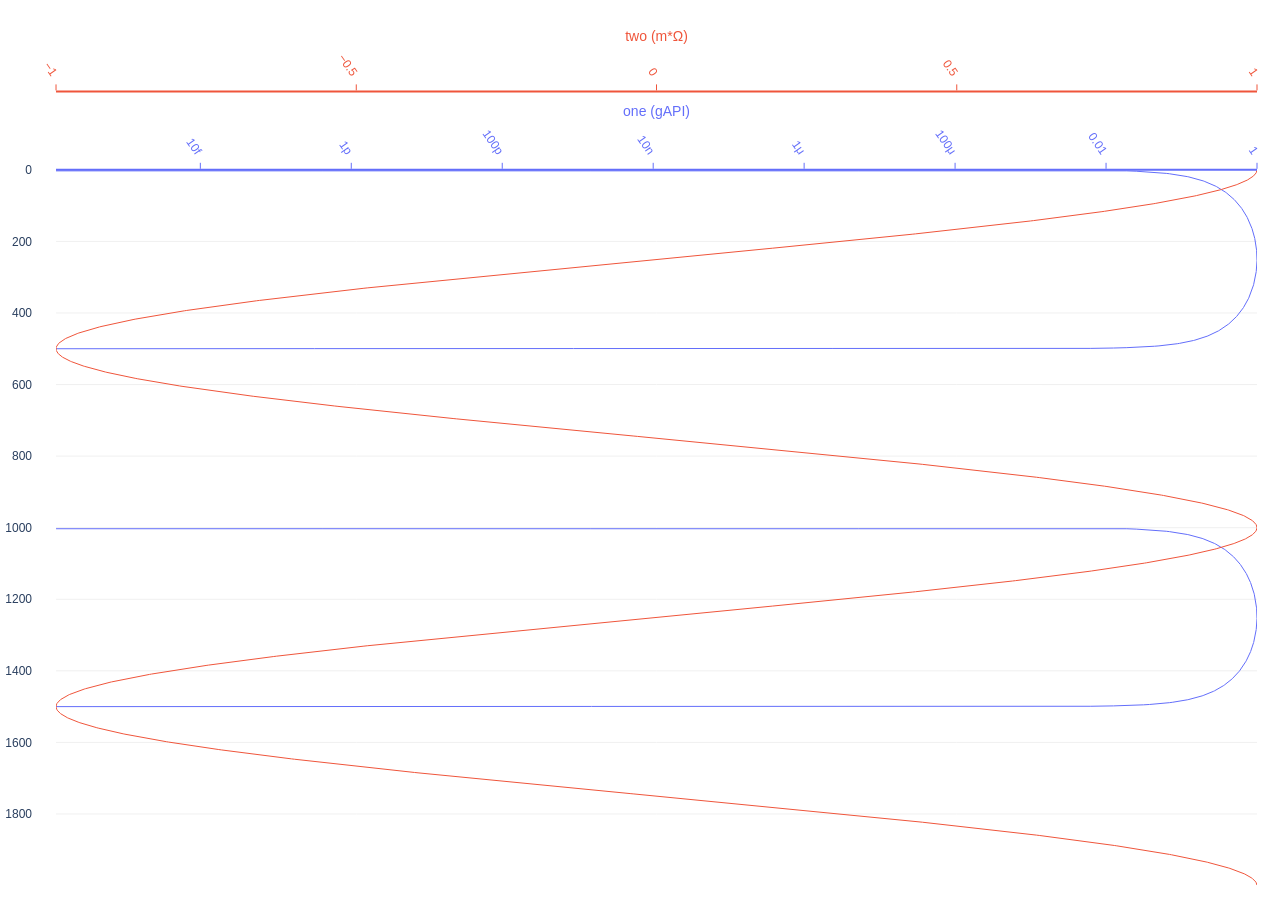

In [6]:
my_theme = pozo.themes.cangrejo.deepcopy()

my_theme["one"] = dict(scale="log") # Nonsense but to demonstrate scales

graph1.set_theme(my_theme)

graph1.render().show(renderer="plotly_mimetype")

In [7]:
pozo.themes.help()

'A dictionary with those values or less can be passed directly to set_theme(), or:'

'Said dictionary can be the value in a key-->value dictionary (say "myDict") where'

'keys represent mnemonics. set_theme(pozo.themes.MnemonicDictionary(myDict))'

'Themes set on more specific items (traces) will override those on less specific items (graphs)'

In [8]:
pozo.renderers.TreeTable().render(graph1) # Just to print out the data structure w/out plotly renderering

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

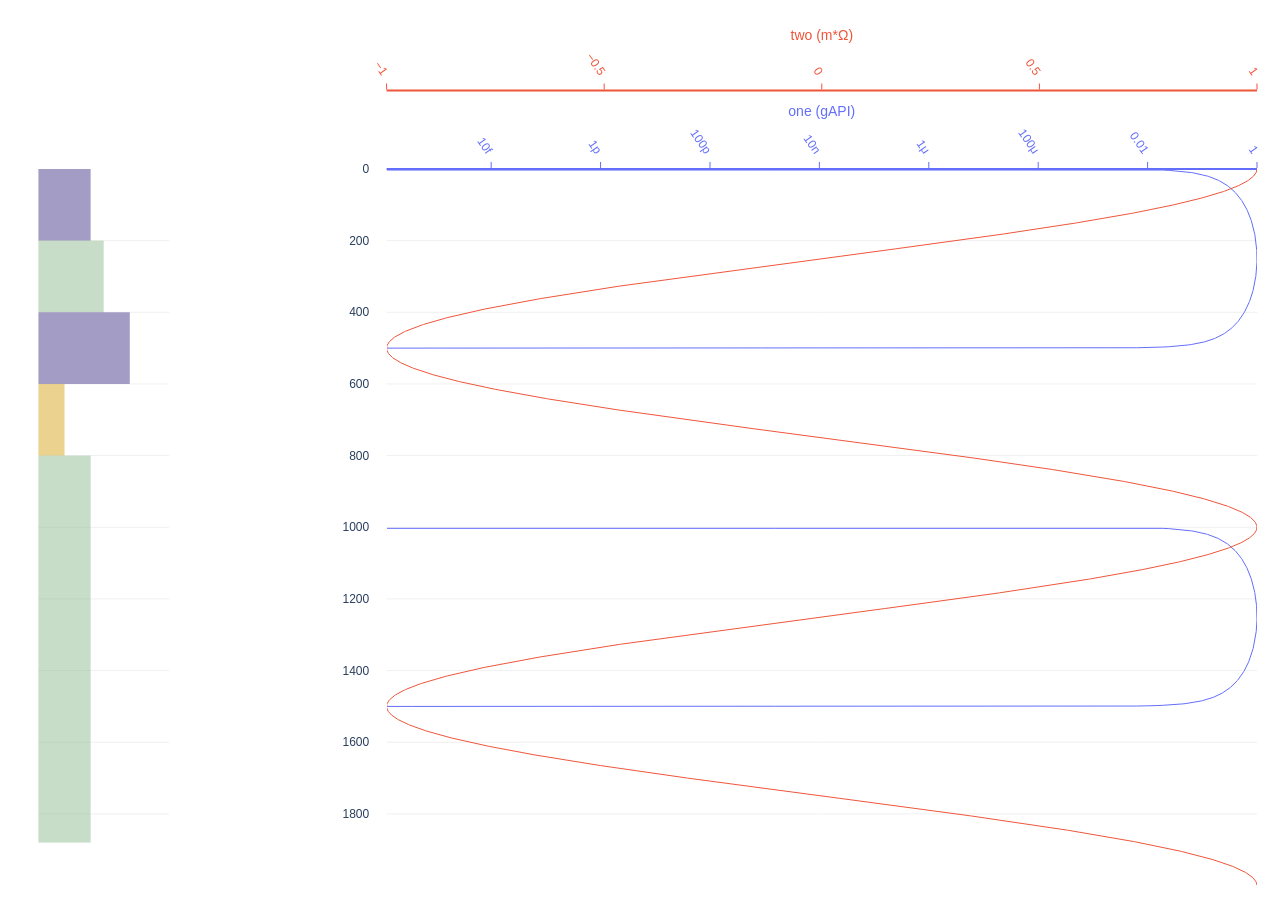

In [9]:
striplog_track = pozo.Track(name="striplog")
striplog_track.set_theme({"force": True, "track_width": 30})
striplog_track.note_list.extend([
    pozo.Note((0, 200), fillcolor='darkslateblue', show_text=False, width=.4),
    pozo.Note((200, 400), fillcolor='darkseagreen', show_text=False, width=.5),
    pozo.Note((400, 600), fillcolor='darkslateblue', show_text=False, width=.7),
    pozo.Note((600, 800), fillcolor='goldenrod', show_text=False, width=.2),
    pozo.Note((800, 1880), fillcolor='darkseagreen', show_text=False, width=.4),
])
graph1.replace_tracks(("striplog", striplog_track))
graph1.move_tracks(striplog_track, position=0)

graph1.render(depth_position=1).show(renderer="plotly_mimetype")

### Step 4: Make a crossplot

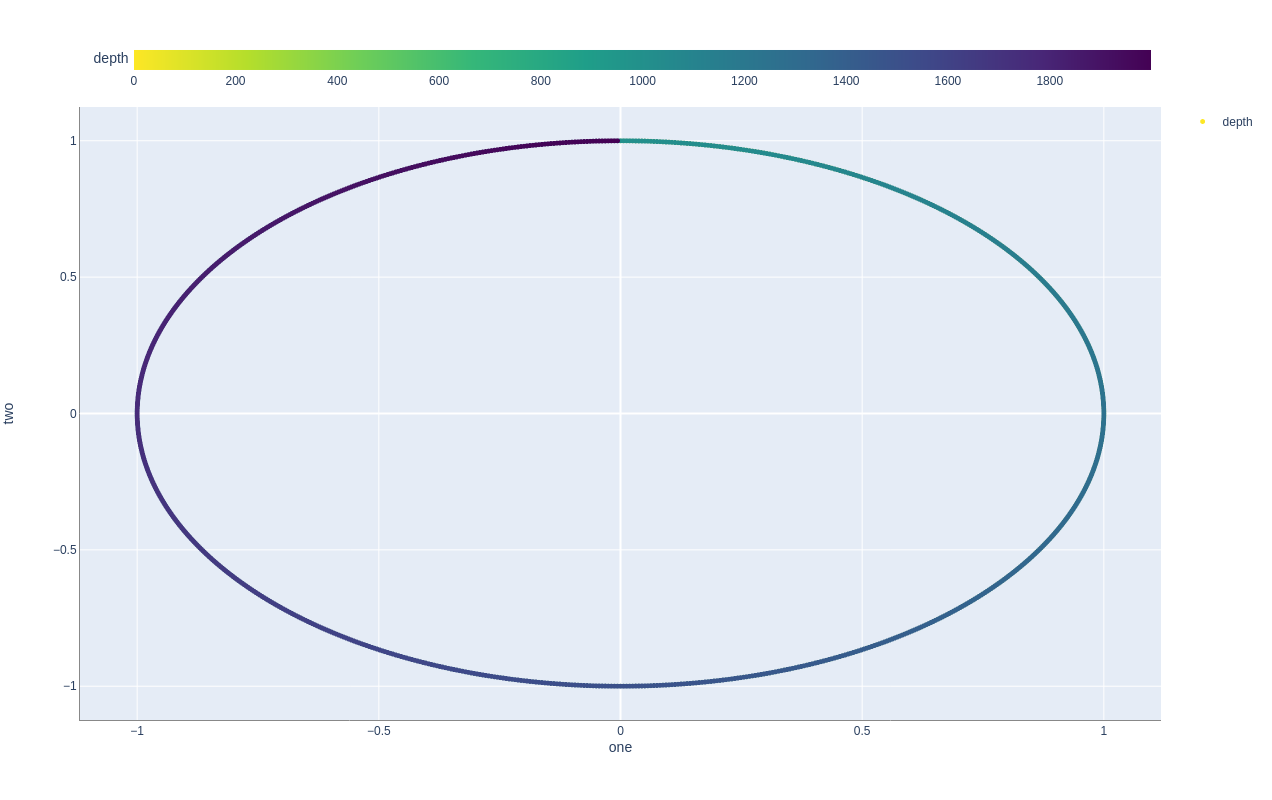

In [10]:
graph1.CrossPlot(
    x = graph1.get_trace("one"),
    y = graph1.get_trace("two"),
    colors = ["depth"],
    size=800,
).render().show(renderer="plotly_mimetype")

### Step 5: Make an interactive crossplot

In [11]:
graph1.render(height=800, xp=graph1.xp)

<IPython.core.display.Javascript object>

xpFigureWidget({
    'data': [{'hoverinfo': 'skip',
              'mode': 'markers',
              'opacity': 0,
              'showlegend': False,
              'type': 'scatter',
              'uid': '9aa343be-8e67-45ef-ac59-a4af04a76d07',
              'x': [0],
              'xaxis': 'x2',
              'y': [0],
              'yaxis': 'y2'},
             {'fillcolor': 'blue',
              'hovertemplate': 'Depth: %{y}, Value: %{x}',
              'line': {'color': '#636efa', 'width': 1},
              'mode': 'lines',
              'name': 'one',
              'showlegend': False,
              'type': 'scatter',
              'uid': '7f58e727-30e8-4656-bbfb-6acfda347a1e',
              'x': array([ 0.        ,  0.00628314,  0.01256604, ..., -0.01884844, -0.01256604,
                          -0.00628314]),
              'xaxis': 'x3',
              'y': array([   0,    1,    2, ..., 1997, 1998, 1999]),
              'yaxis': 'y2'},
             {'fillcolor': 'blue',
            